In [3]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [18]:
# On teste l'ARIMA incrémental

df = pd.read_csv("./data/revised_dataset.csv", sep=";")

df = df[["Latence1"]]
totalRowNumber = len(df.index)
numberOfValueToPredictPerIteration = 5
trainingSampleSize = 100   # On decide de ne prendre que les 40 premieres valeurs pour entrainer le modele
numberOfIteration = int((totalRowNumber-trainingSampleSize)/numberOfValueToPredictPerIteration)
dfArima = df.head(trainingSampleSize)

predictedValues = dfArima["Latence1"].tolist()

listRealValues = df["Latence1"].tolist()


for i in range(numberOfIteration):
    try:
        modArima = ARIMA(listRealValues[numberOfValueToPredictPerIteration*i:numberOfValueToPredictPerIteration*i+trainingSampleSize], order=(4, 2, 4))
        model = modArima.fit()
        predictedValues = predictedValues + model.forecast(numberOfValueToPredictPerIteration).tolist()
    except:
        print(i)
    


C:\Users\probook\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\probook\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\probook\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\probook\AppData\Local\

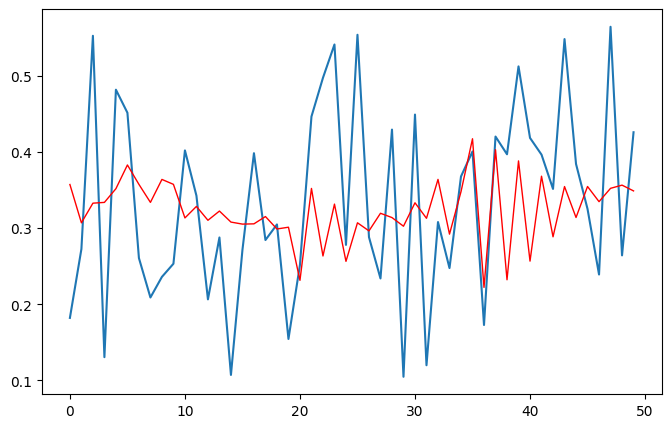

In [24]:

#Displaying predictions and actual values

borneInf = 11100
borneMax = 11150

x_axis = range(borneMax-borneInf)

plt.figure(num = 3, figsize=(8, 5))
plt.plot(x_axis, listRealValues[borneInf:borneMax])
plt.plot(x_axis, predictedValues[borneInf:borneMax], 
         color='red',   
         linewidth=1.0)
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error

rms = 55555
for i in range(2,int(len(listRealValues)/50)):
    try:
        rmsAct = mean_squared_error(listRealValues[50*i:50*(i+1)], predictedValues[50*i:50*(i+1)], squared=False)
        if (rmsAct < rms):
            rms = rmsAct
            minInter = 50*i
            maxInter = 50*(i+1)

    except:
        print("saucisse")


print(minInter, maxInter, rms)

11100 11150 0.12353956472895491
